# Training and Validation losses

In [8]:
# Reloads modules automatically before executing code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Imports
import os
import torch
from torch.utils.data import DataLoader as TorchDataLoader
from DL_vs_HateSpeech.loading_data.dataloader import DataLoader
from DL_vs_HateSpeech.training.training import collate_fn
from DL_vs_HateSpeech.plots.plot_loss import plot_losses_from_path
from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.models import load_model_from_path
from DL_vs_HateSpeech.utils import get_label_str_list
import matplotlib.pyplot as plt
device = "cpu"


## Model v0

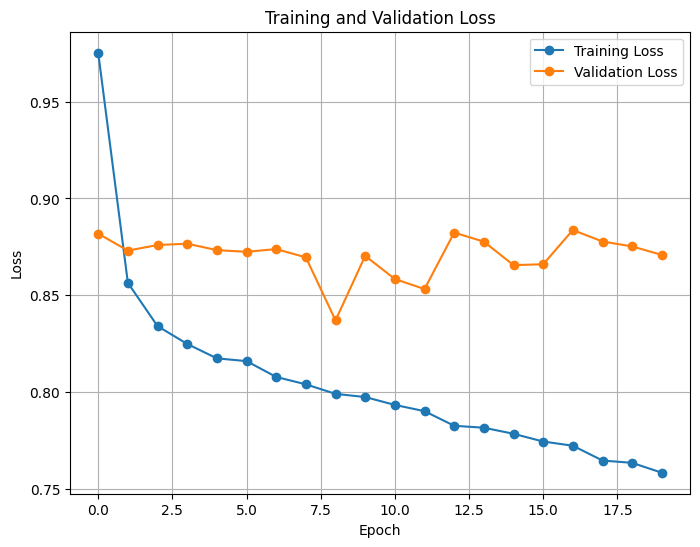

In [10]:
path = "./models/model_checkpoints/model_0"
# See the files in the path
plot_losses_from_path(path)

Prediction: ['somewhat harmful']
True labels: ['not harmful']


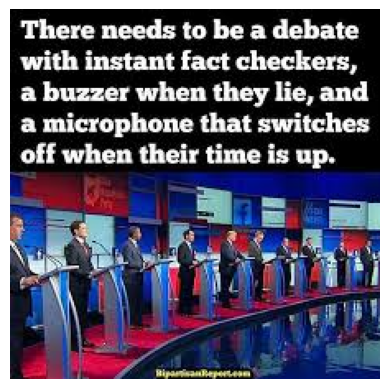

In [11]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 1

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)
        # Compute predictions (get the class with the highest probability)
        print("Prediction:", get_label_str_list(torch.argmax(probs, dim=1)))
        print("True labels:", get_label_str_list(labels))
        plt.imshow(images[0])
        plt.axis('off')  # Hide the axes
        plt.show()
        break

## Model V0 with augmentation

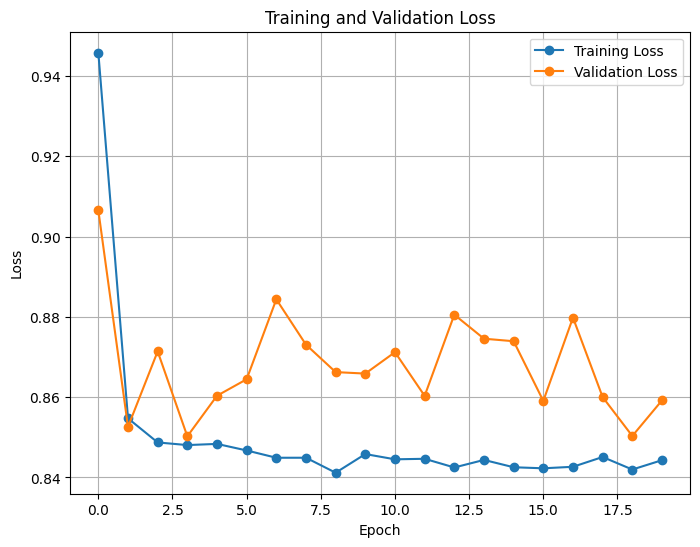

In [12]:
path = "./models/model_checkpoints/model_0_with_augmentation/epochs_20"
# See the files in the path
plot_losses_from_path(path)

Prediction: ['not harmful']
True labels: ['not harmful']


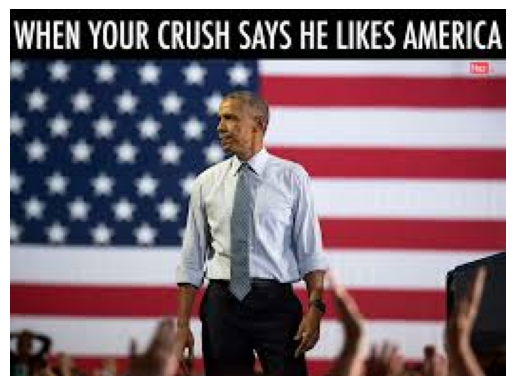

In [13]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 1

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)
        # Compute predictions (get the class with the highest probability)
        print("Prediction:", get_label_str_list(torch.argmax(probs, dim=1)))
        print("True labels:", get_label_str_list(labels))
        plt.imshow(images[0])
        plt.axis('off')  # Hide the axes
        plt.show()
        break

## Model V1 no augmentation

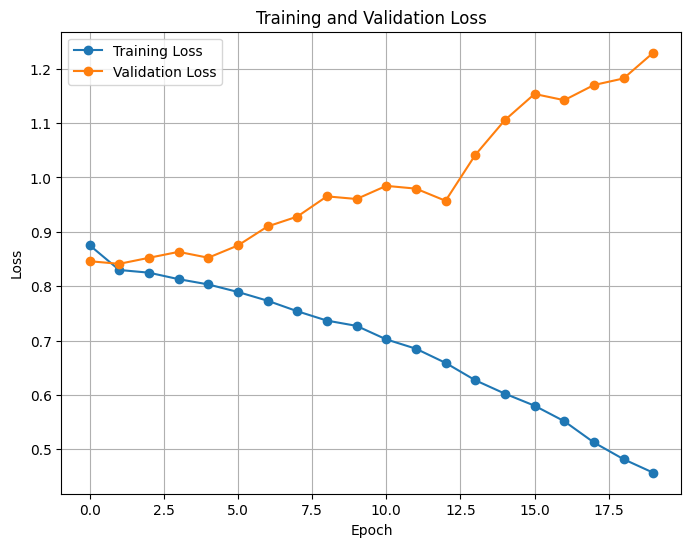

In [14]:
path = "./models/model_checkpoints/model_1"
# See the files in the path
plot_losses_from_path(path)

In [15]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 1

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)
        # Compute predictions (get the class with the highest probability)
        print("Prediction:", get_label_str_list(torch.argmax(probs, dim=1)))
        print("True labels:", get_label_str_list(labels))
        plt.imshow(images[0])
        plt.axis('off')  # Hide the axes
        plt.show()
        break

RuntimeError: Error(s) in loading state_dict for AttentionClassifier:
	Missing key(s) in state_dict: "encoder_layer.self_attn.in_proj_weight", "encoder_layer.self_attn.in_proj_bias", "encoder_layer.self_attn.out_proj.weight", "encoder_layer.self_attn.out_proj.bias", "encoder_layer.linear1.weight", "encoder_layer.linear1.bias", "encoder_layer.linear2.weight", "encoder_layer.linear2.bias", "encoder_layer.norm1.weight", "encoder_layer.norm1.bias", "encoder_layer.norm2.weight", "encoder_layer.norm2.bias". 

## Model V1 with augmentation

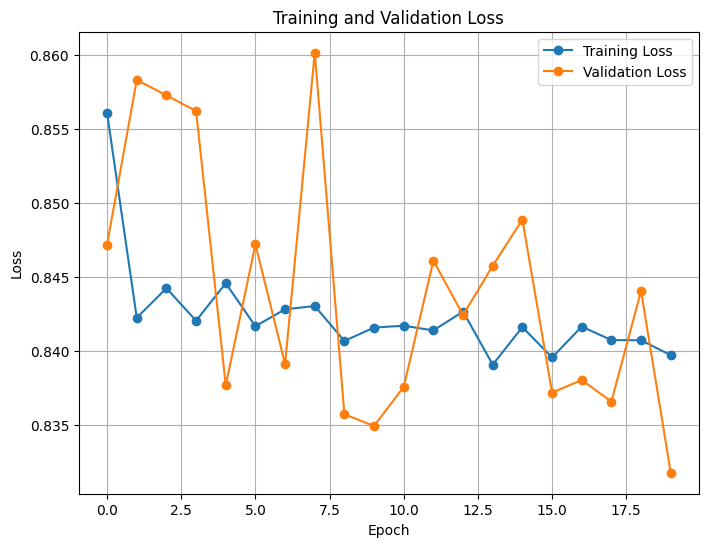

In [ ]:
path = "./models/model_checkpoints/model_1_with_augmentation"
# See the files in the path
plot_losses_from_path(path)

Prediction: ['somewhat harmful']
True labels: ['very harmful']


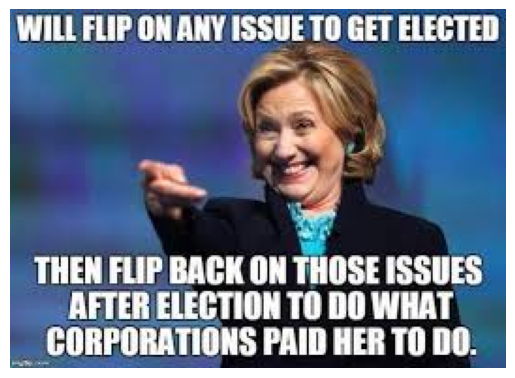

In [ ]:
model = load_model_from_path(path, device=device)
model.eval()

# Load Data
train_dataset = DataLoader(type="train")
val_dataset = DataLoader(type="val")
BATCH_SIZE = 1

train_loader = TorchDataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = TorchDataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

for images, texts, labels in val_loader:
        probs = model(texts, images)
        # Compute predictions (get the class with the highest probability)
        print("Prediction:", get_label_str_list(torch.argmax(probs, dim=1)))
        print("True labels:", get_label_str_list(labels))
        plt.imshow(images[0])
        plt.axis('off')  # Hide the axes
        plt.show()
        break

# ModelV2

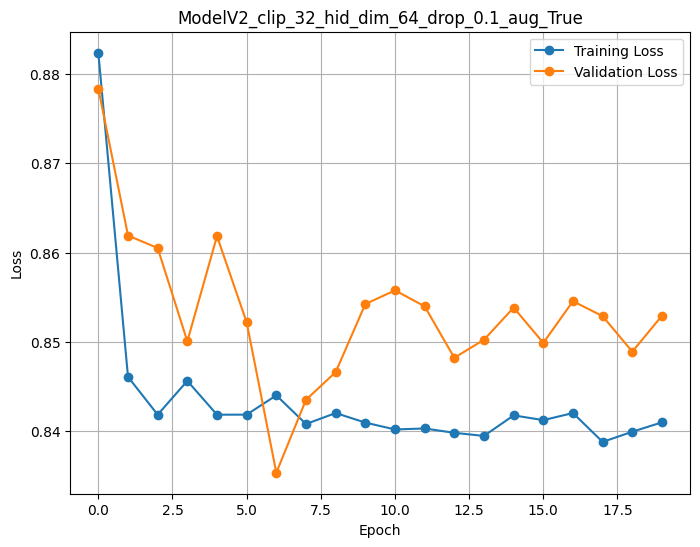

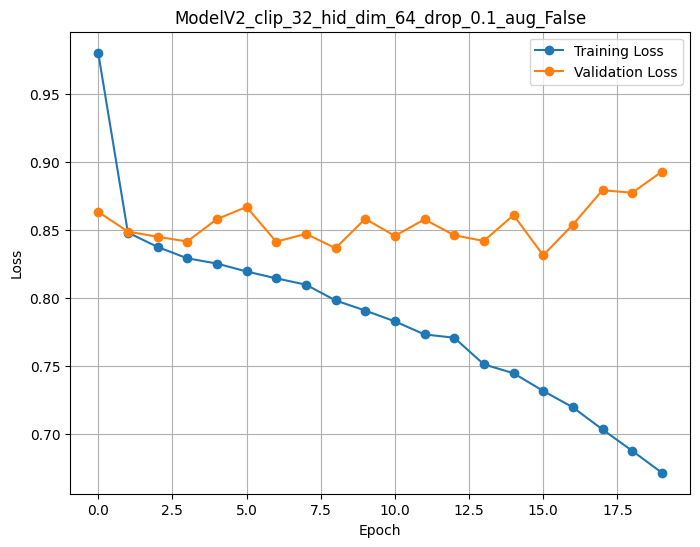

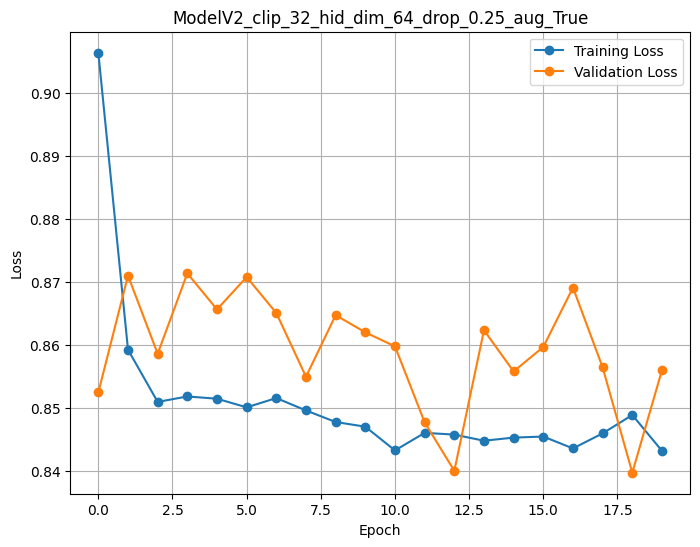

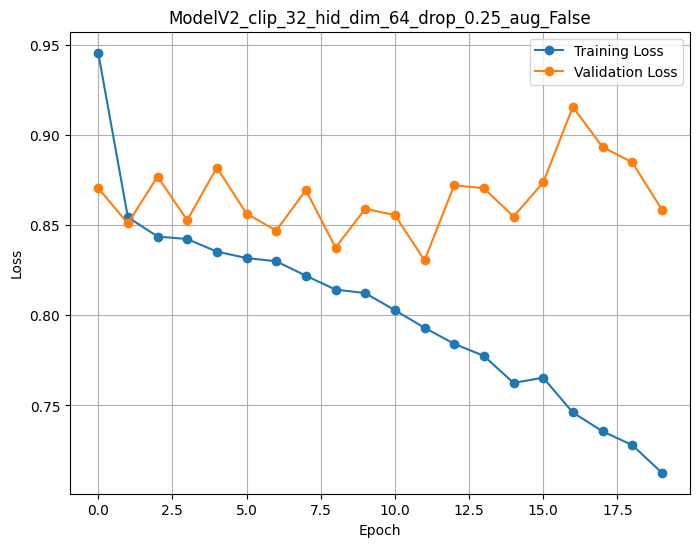

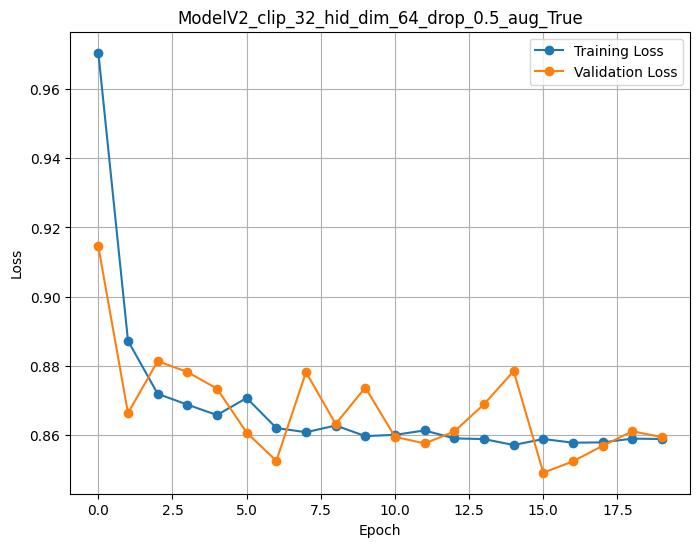

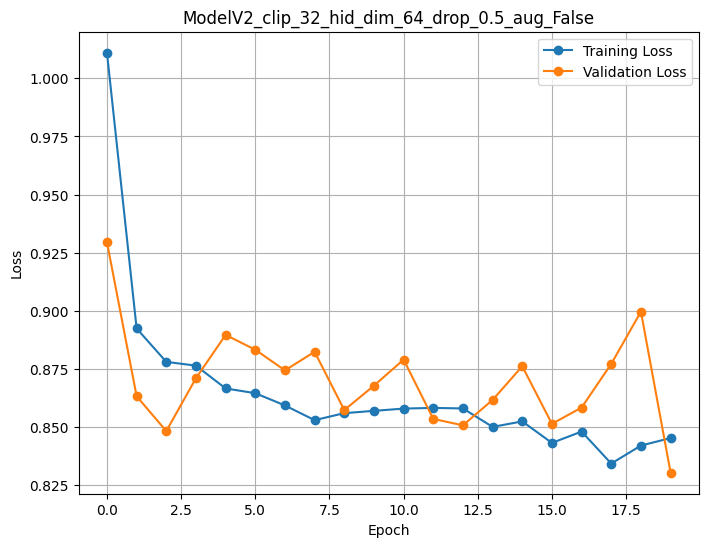

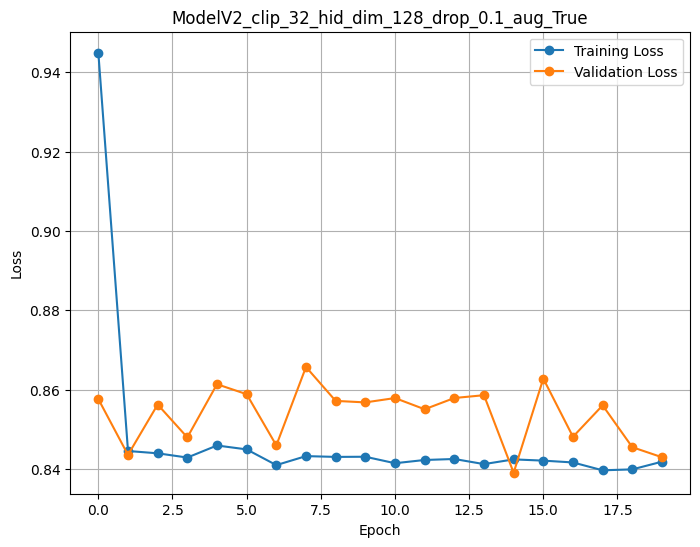

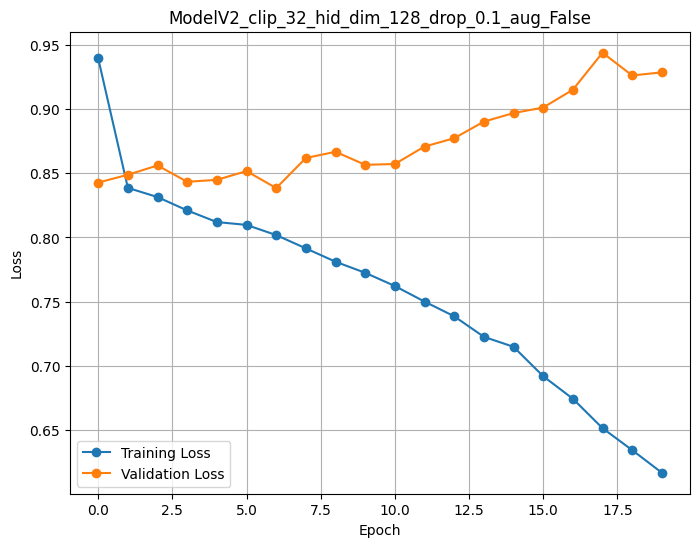

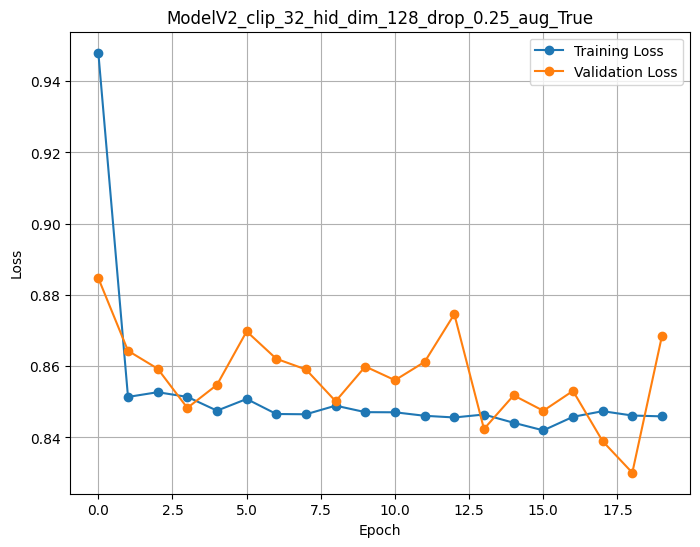

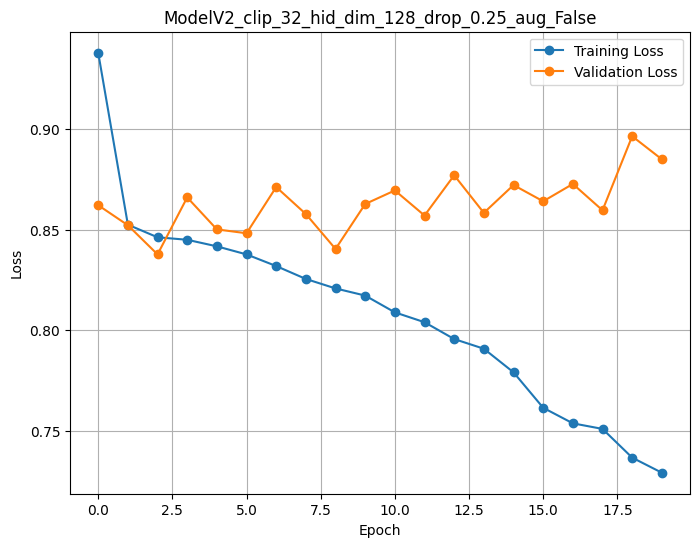

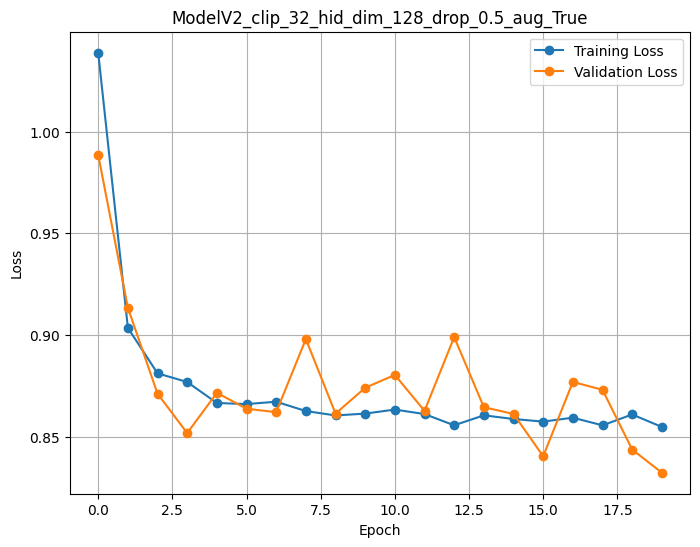

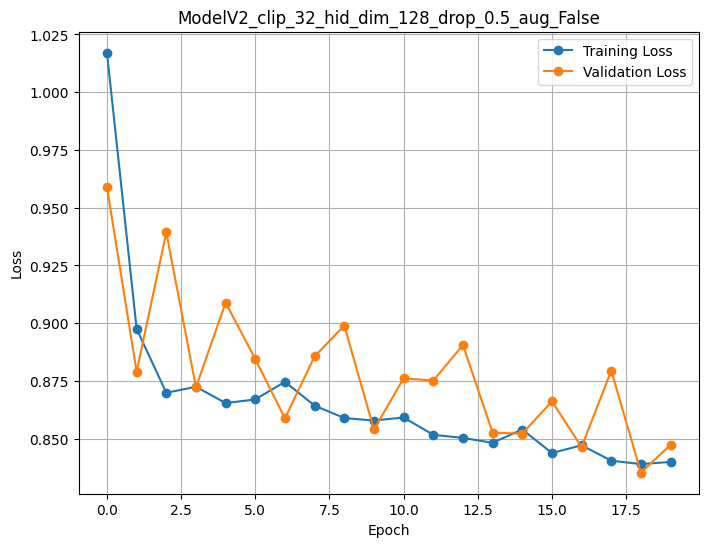

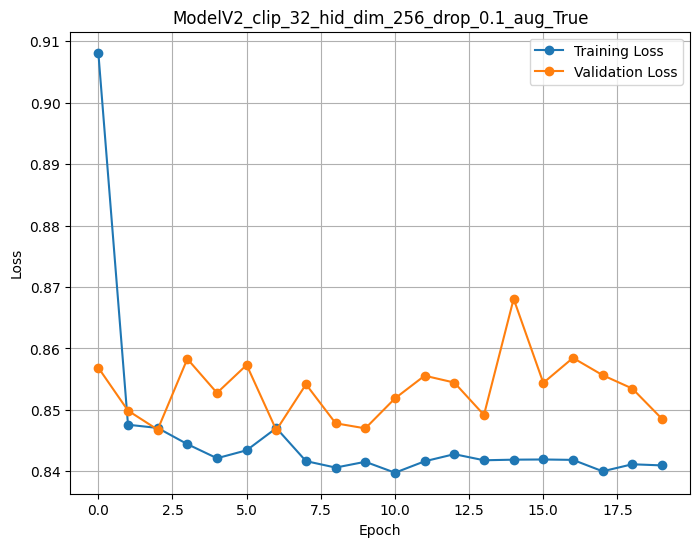

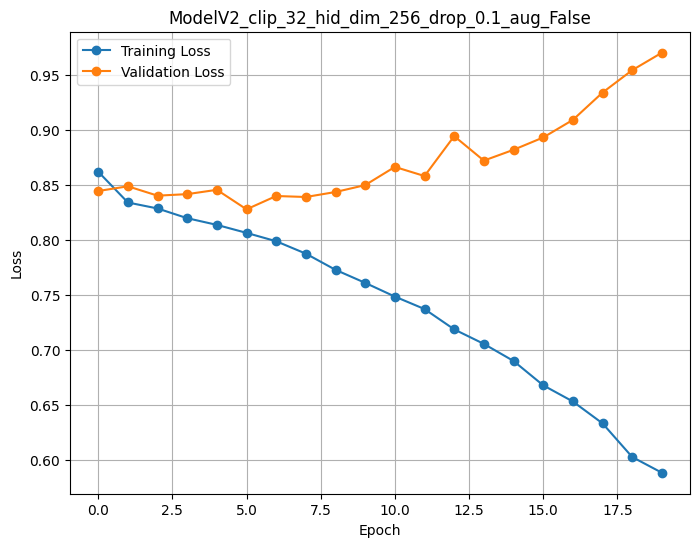

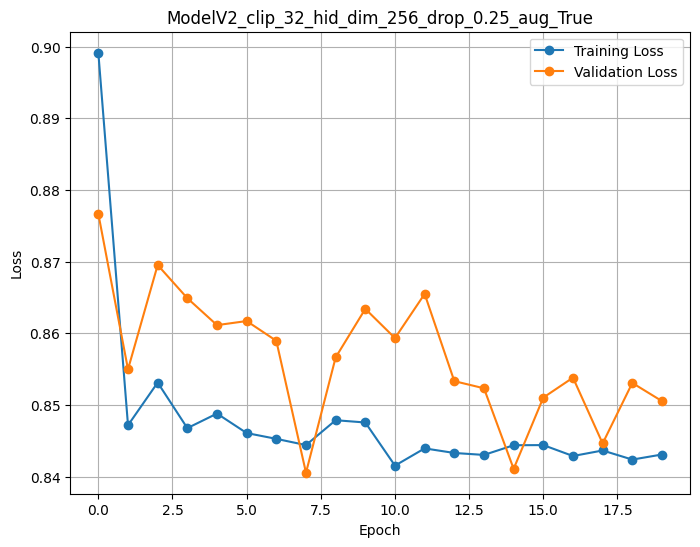

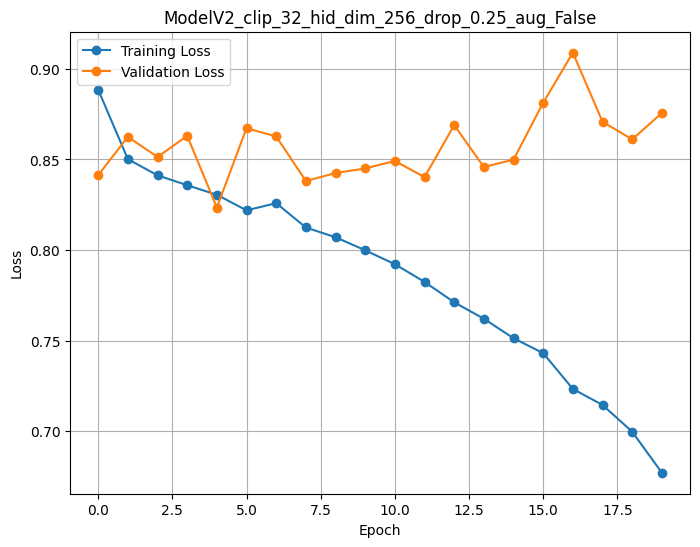

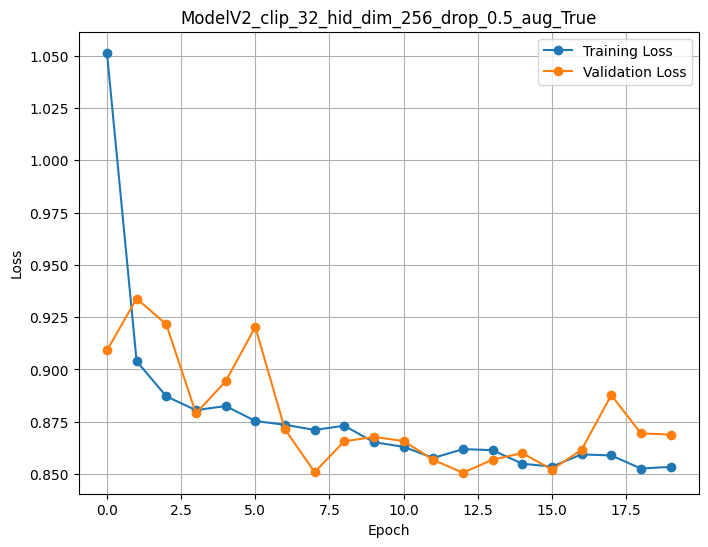

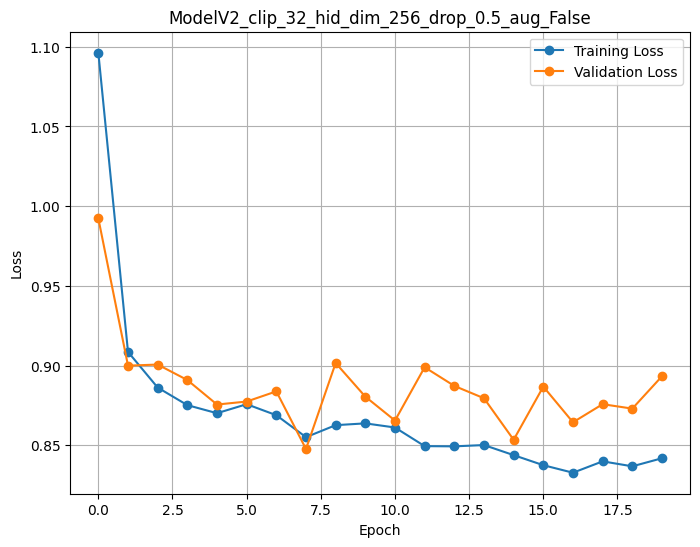

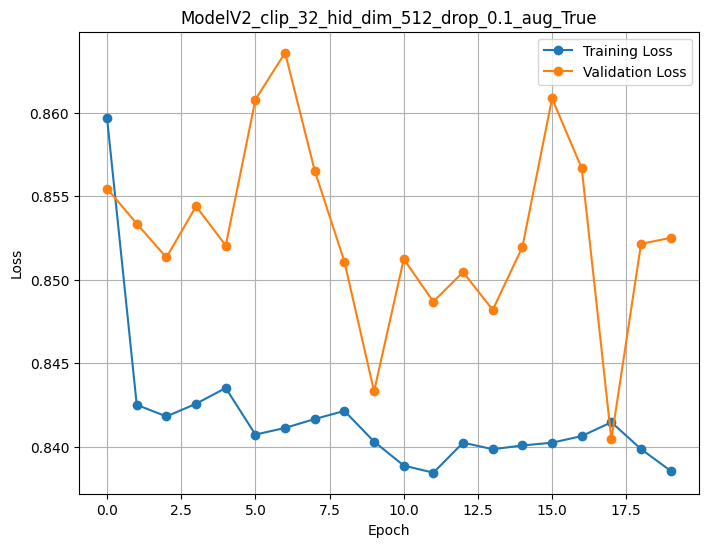

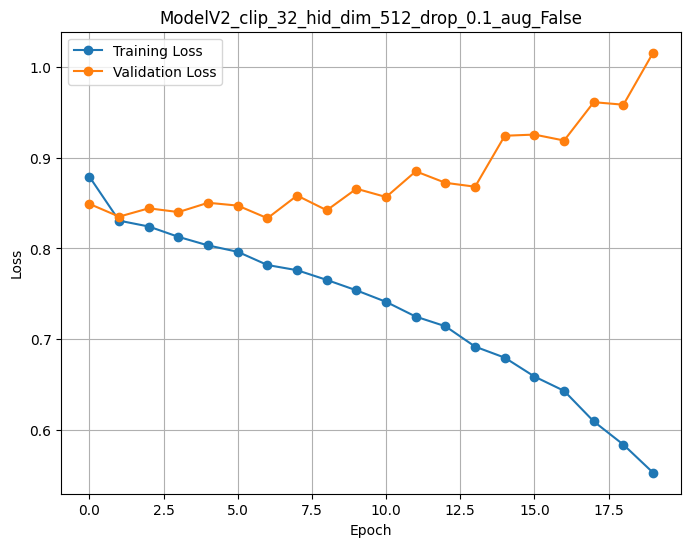

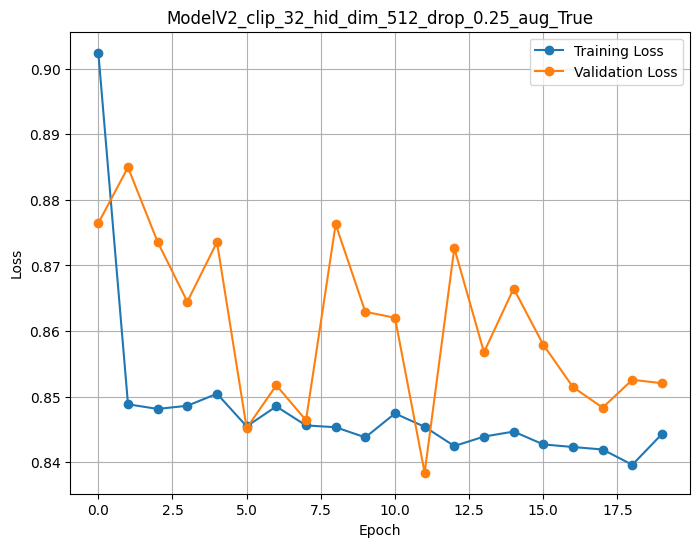

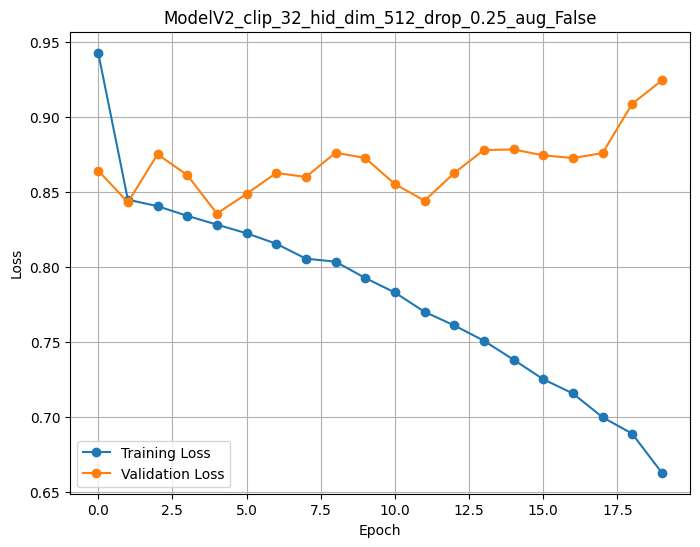

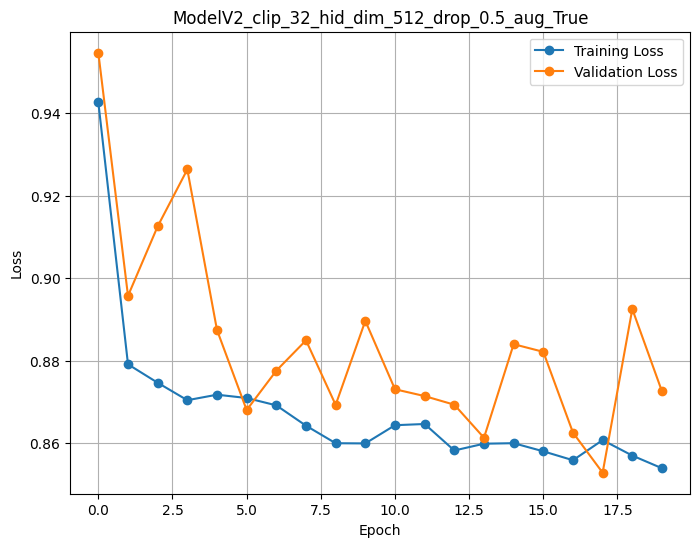

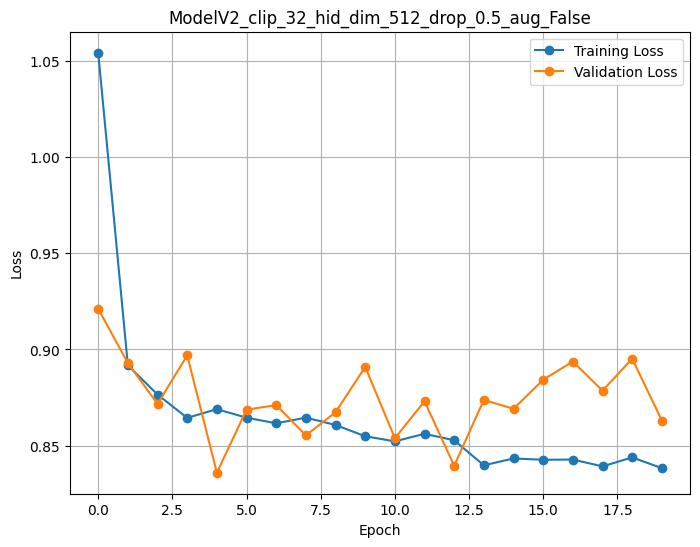

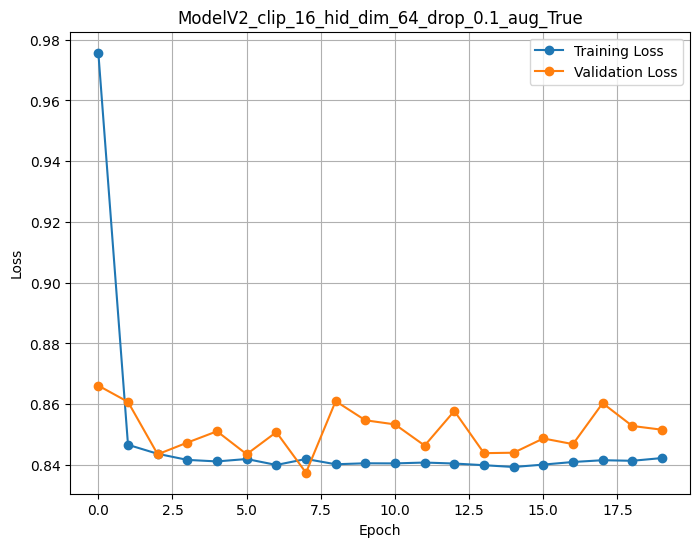

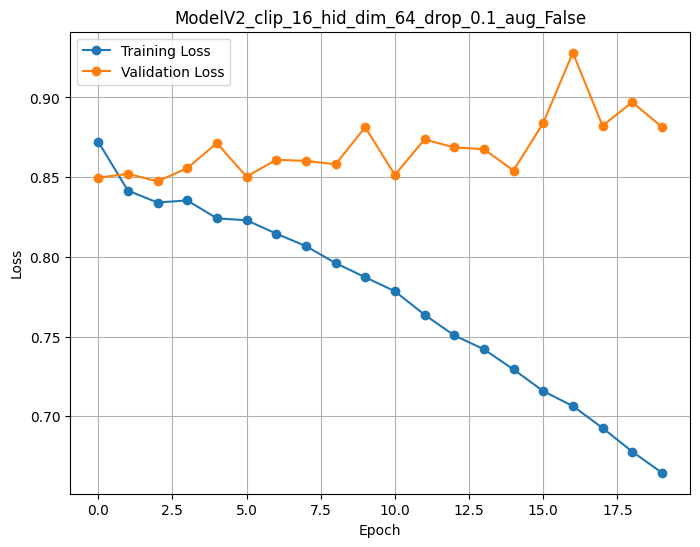

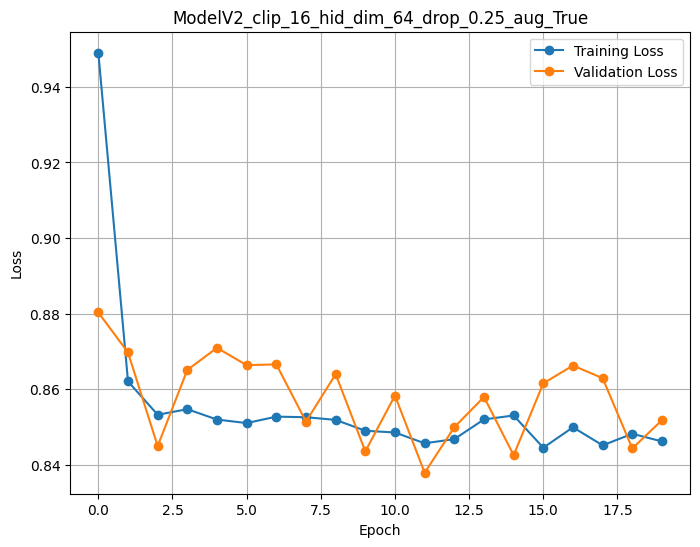

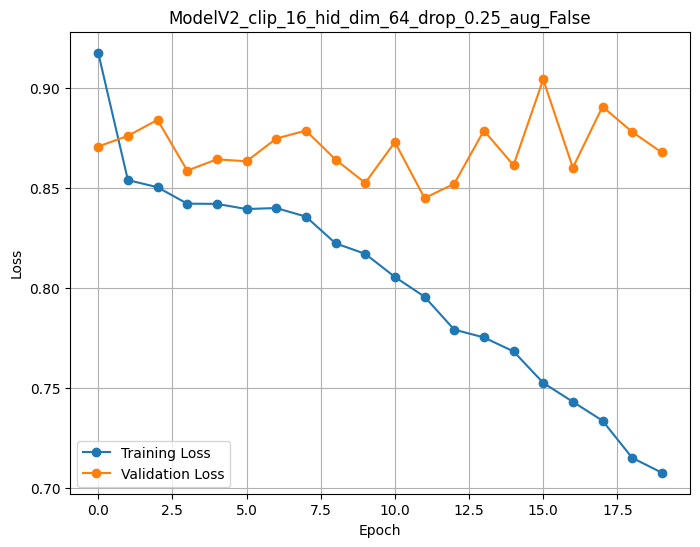

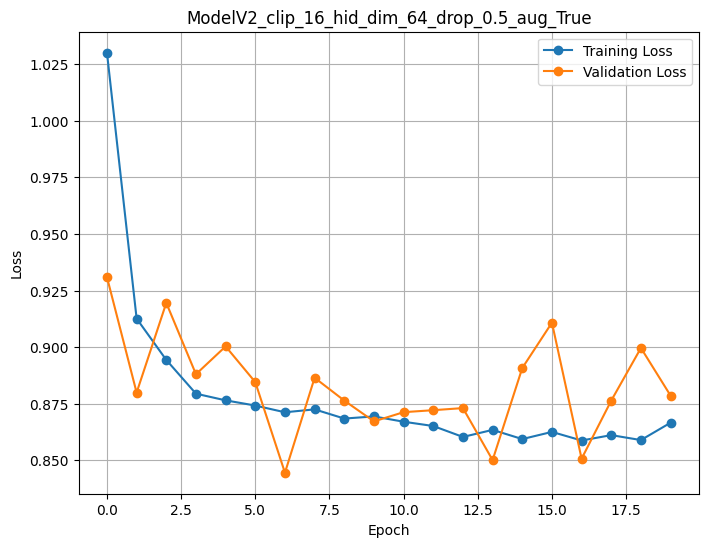

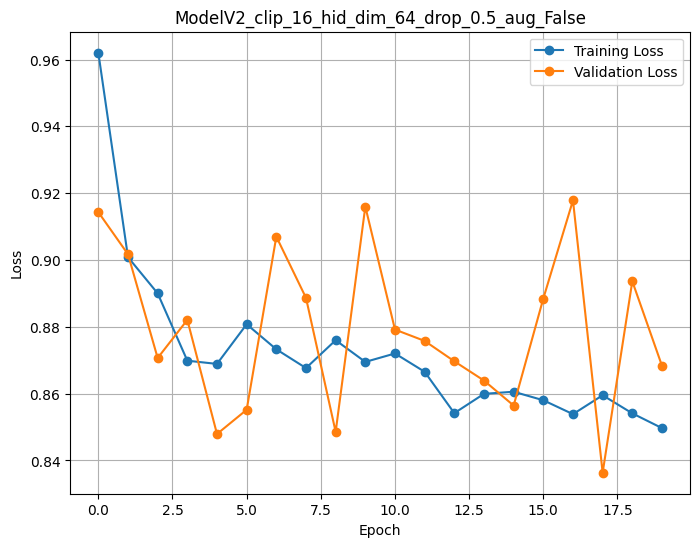

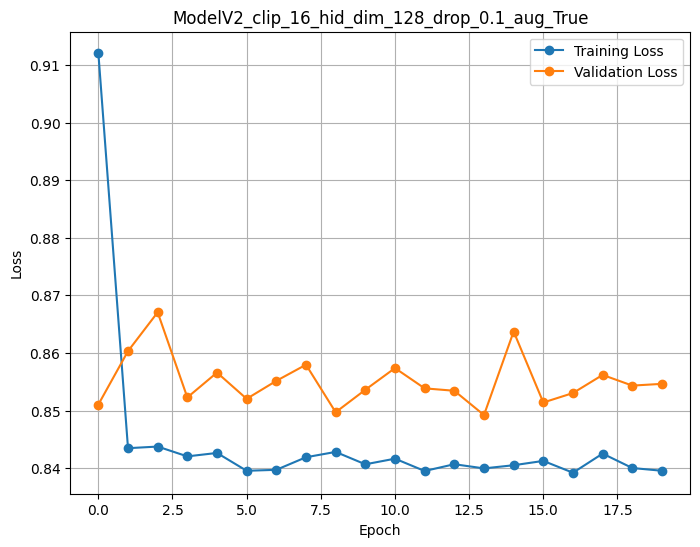

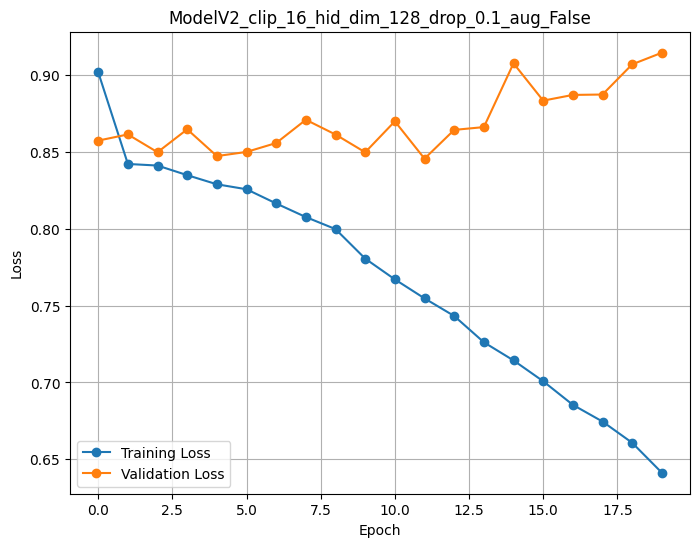

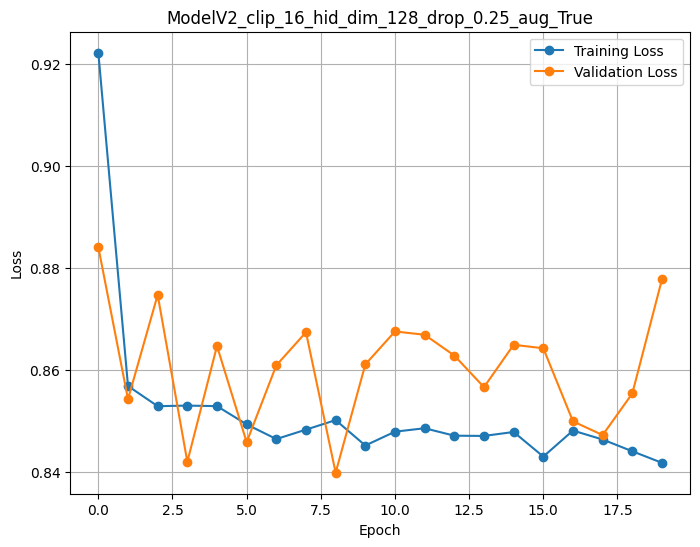

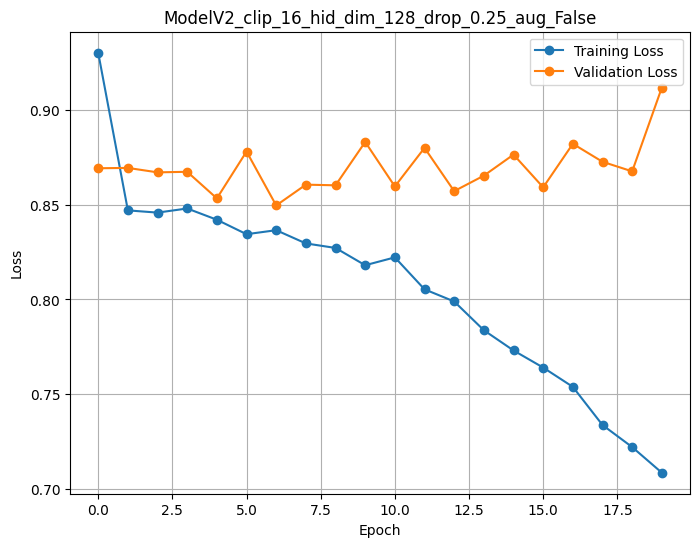

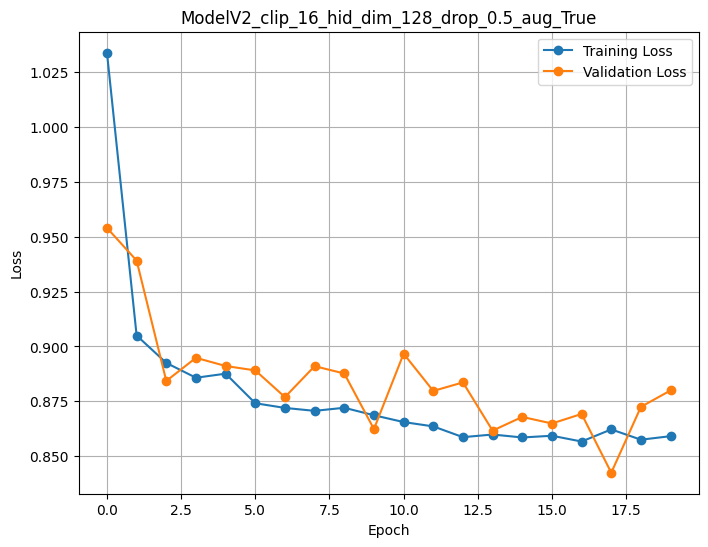

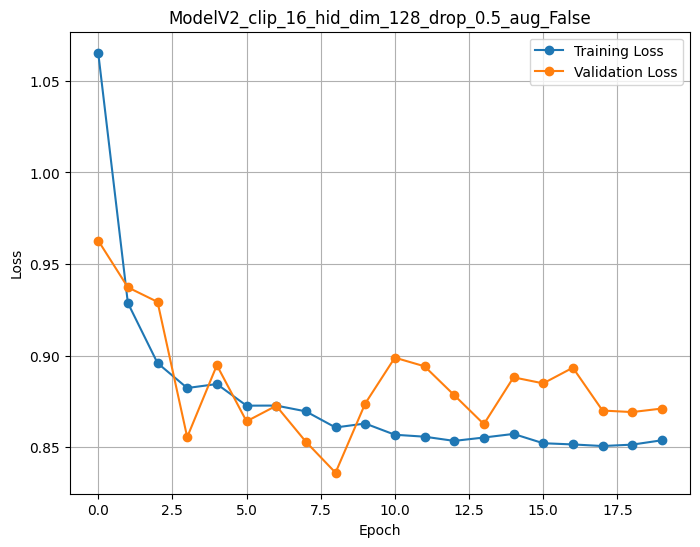

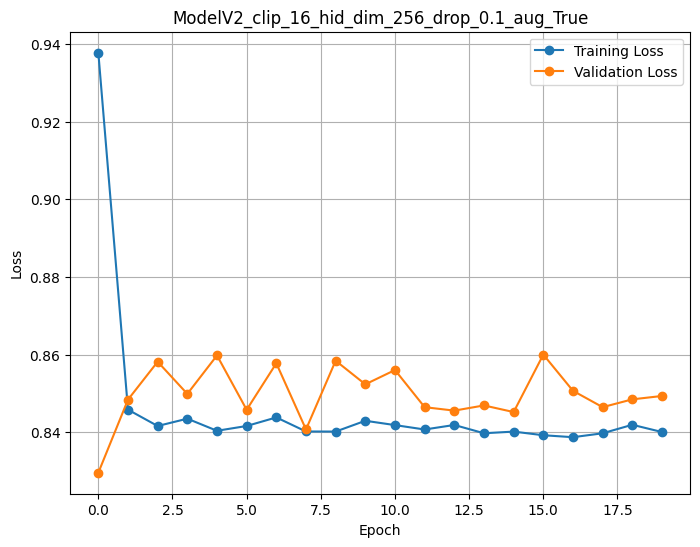

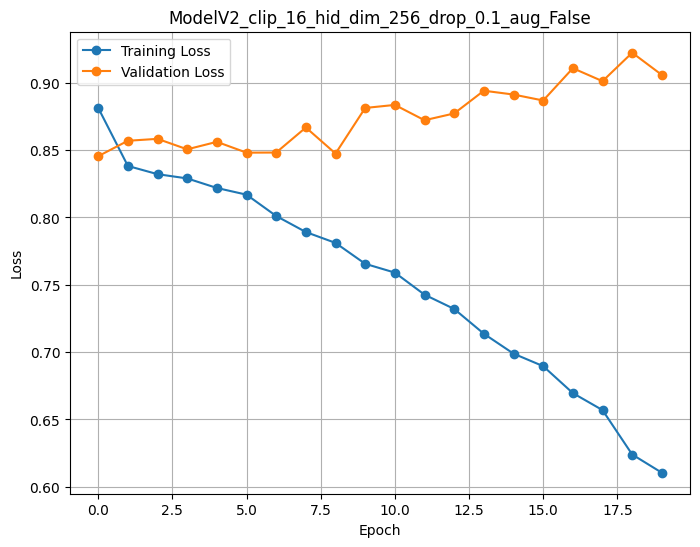

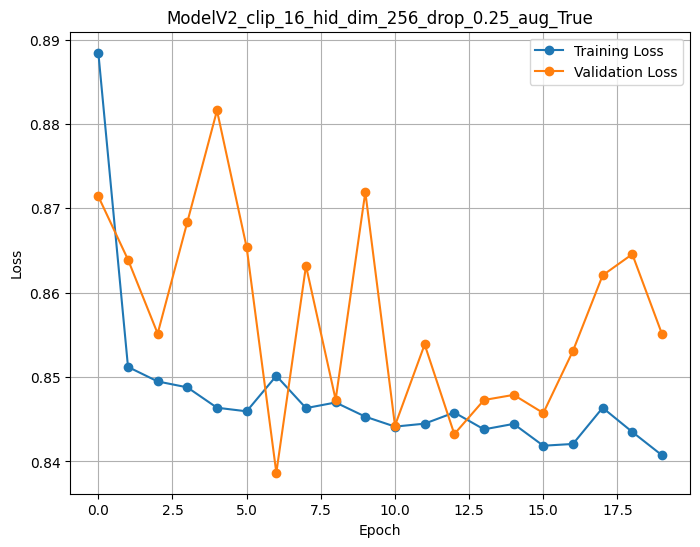

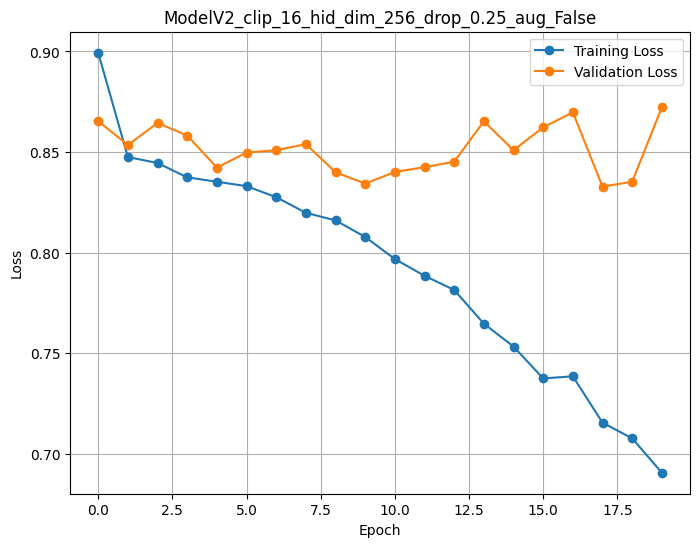

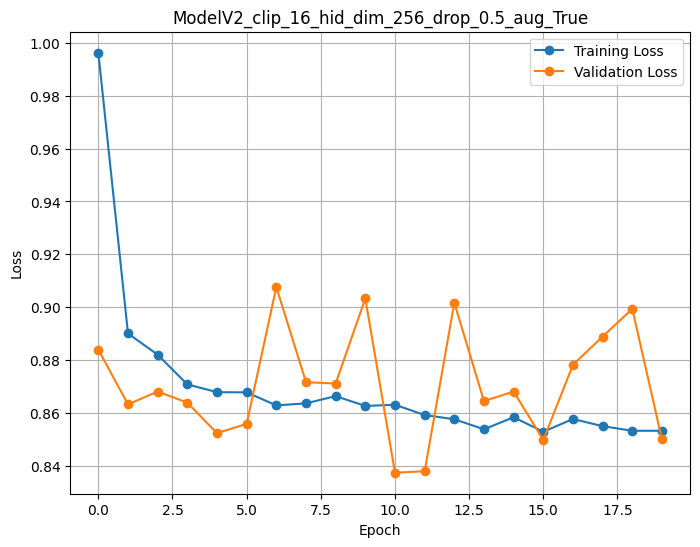

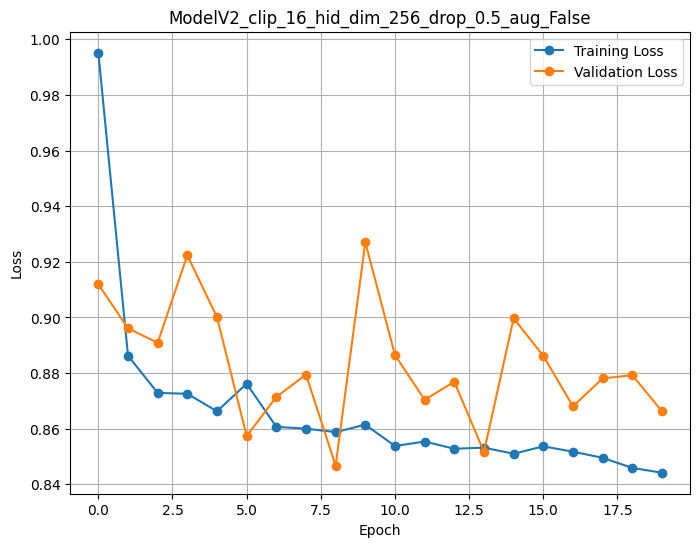

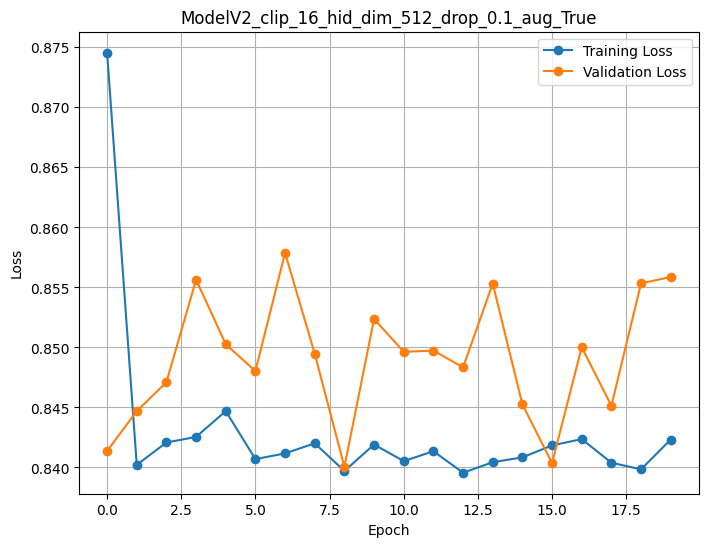

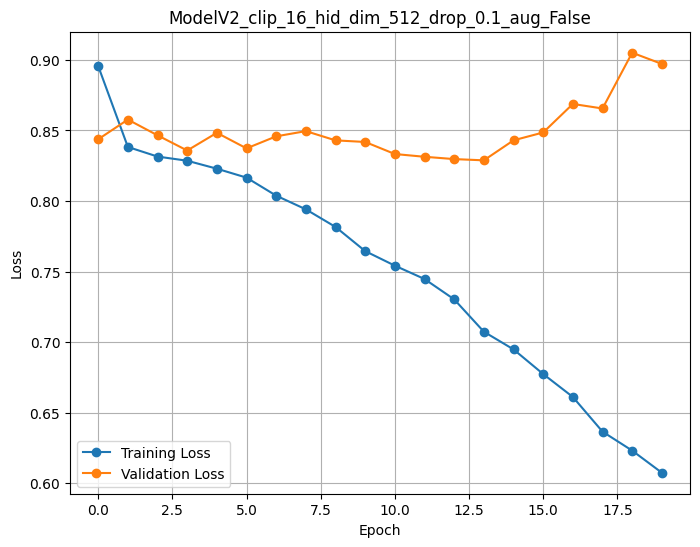

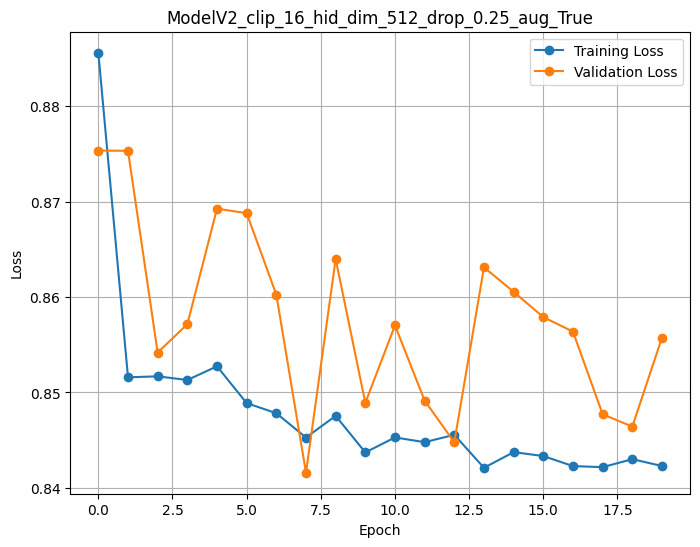

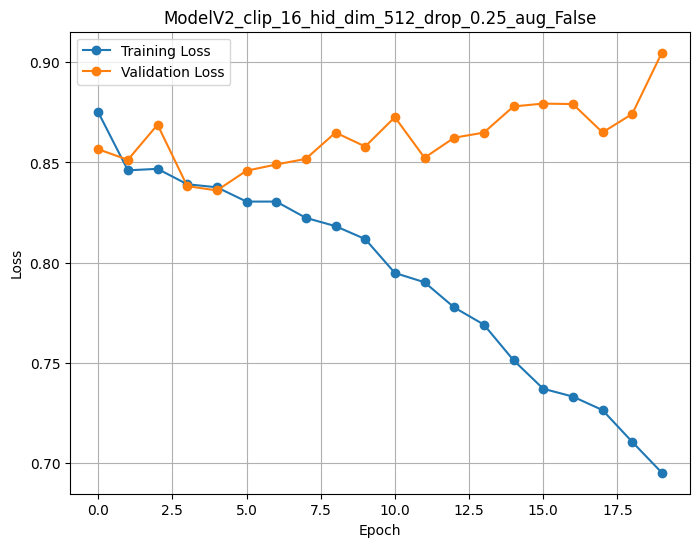

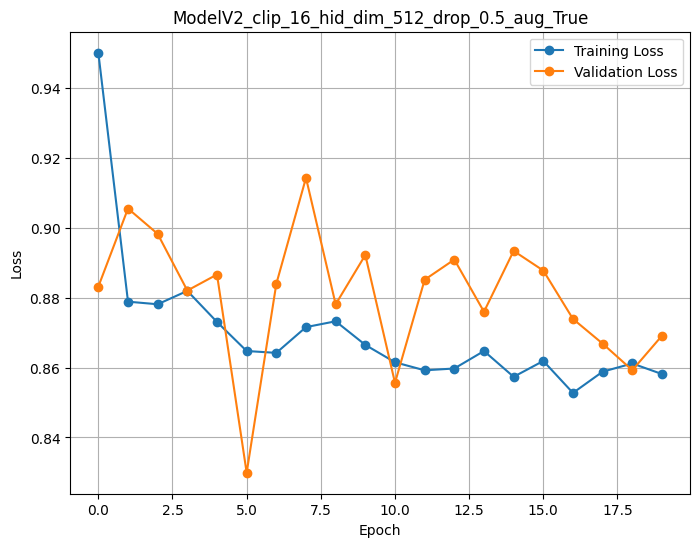

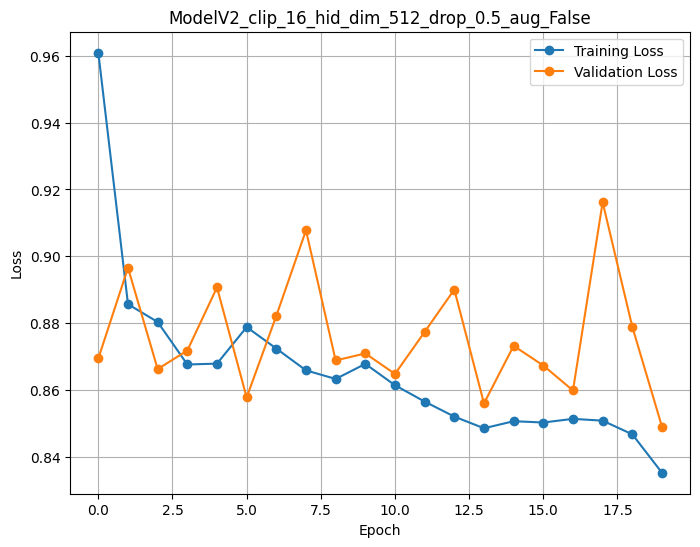

In [19]:
for clip_model_type in ["32", "16"]:
    for hidden_dim in [64, 128, 256, 512]:
        for dropout in [0.1, 0.25, 0.5]:
            for augmentation in [True, False]:
                path = f"./models/model_checkpoints/ModelV2_clip_{clip_model_type}_hid_dim_{hidden_dim}_drop_{dropout}_aug_{augmentation}"
                plot_losses_from_path(path, title=f"ModelV2_clip_{clip_model_type}_hid_dim_{hidden_dim}_drop_{dropout}_aug_{augmentation}")